In [207]:
import pandas as pd

data = pd.read_csv("train.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [208]:
data[['Pclass','Age','Sex']]

,Pclass,Age,Sex
0,3,22.0,male
1,1,38.0,female
2,3,26.0,female
3,1,35.0,female
4,3,35.0,male
...,...,...,...
886,2,27.0,male
887,1,19.0,female
888,3,NaN,female
889,1,26.0,male


In [209]:
df = data[['Survived','Pclass','Age','Sex']]
df

,Survived,Pclass,Age,Sex
0,0,3,22.0,male
1,1,1,38.0,female
2,1,3,26.0,female
3,1,1,35.0,female
4,0,3,35.0,male
...,...,...,...,...
886,0,2,27.0,male
887,1,1,19.0,female
888,0,3,NaN,female
889,1,1,26.0,male


In [210]:
df.dropna(subset=['Age'],how='any', inplace=True)

<ipython-input-210-9121408a0ee3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['Age'],how='any', inplace=True)


In [211]:
df

,Survived,Pclass,Age,Sex
0,0,3,22.0,male
1,1,1,38.0,female
2,1,3,26.0,female
3,1,1,35.0,female
4,0,3,35.0,male
...,...,...,...,...
885,0,3,39.0,female
886,0,2,27.0,male
887,1,1,19.0,female
889,1,1,26.0,male


In [212]:
character = [] 
for age,sex in zip(df['Age'], df['Sex']) : 
    if age < 20 and sex=='male':
        character.append('1') 
    elif age < 20 and sex=='female':
        character.append('2') 
    elif age < 30 and sex=='male':
        character.append('3') 
    elif age < 30 and sex=='female':
        character.append('4') 
    elif age < 40 and sex=='male':
        character.append('5') 
    elif age < 40 and sex=='female':
        character.append('6') 
    elif age < 50 and sex=='male':
        character.append('7') 
    elif age < 50 and sex=='female':
        character.append('8') 
    elif age < 60 and sex=='male':
        character.append('9') 
    elif age < 60 and sex=='female':
        character.append('10') 
    elif age < 70 and sex=='male':
        character.append('11') 
    elif age < 70 and sex=='female':
        character.append('12')
    elif age < 80 and sex=='male':
        character.append('13') 
    elif age < 80 and sex=='female':
        character.append('14')
    else :
        character.append('15')
        
df['character'] = character

<ipython-input-212-1916ae472062>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['character'] = character


In [213]:
print(df)

     Survived  Pclass   Age     Sex character
0           0       3  22.0    male         3
1           1       1  38.0  female         6
2           1       3  26.0  female         4
3           1       1  35.0  female         6
4           0       3  35.0    male         5
..        ...     ...   ...     ...       ...
885         0       3  39.0  female         6
886         0       2  27.0    male         3
887         1       1  19.0  female         2
889         1       1  26.0    male         3
890         0       3  32.0    male         5

[714 rows x 5 columns]


In [214]:
import numpy as np
df = df[['Survived','Pclass','character']]
training_data = df[['Pclass','character']].to_numpy()
training_data = training_data.astype(np.int)
print(training_data)

<ipython-input-214-2ba4062cf782>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  training_data = training_data.astype(np.int)


[[3 3]
 [1 6]
 [3 4]
 ...
 [1 2]
 [1 3]
 [3 5]]


In [215]:
print(training_data.shape)

(714, 2)


In [216]:
df

,Survived,Pclass,character
0,0,3,3
1,1,1,6
2,1,3,4
3,1,1,6
4,0,3,5
...,...,...,...
885,0,3,6
886,0,2,3
887,1,1,2
889,1,1,3


In [217]:
target = df['Survived']
print(target)

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 714, dtype: int64


In [218]:
training_target = target.to_numpy()

In [219]:
print(training_target.shape)

(714,)


In [241]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    training_data, training_target,  stratify=training_target ,random_state=42)

In [238]:
print(train_input.shape,test_input.shape)

(535, 2) (179, 2)


In [243]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=5)
kn.fit(train_input, train_target)
kn.score(test_input,test_target)

0.7541899441340782

In [223]:
print(train_input[:,1])

[ 2  1  3  3  7 11  5  3  7  1  4  3 10  7  1  9  6  4  2 11  6  3  3  5
  1  2  7  9  3  7  8 13  1  1  5  2  1  6  5  8  5  5  3  1  1  4  9  1
  3  4  1  2  3  1 10  9  2  3  6  7  2  7  3  1  2  3  4  1  6  4  9  7
  2  3  3  7  1  3  5  8  6  5  3  5  2  3  2  5  6  7 11  5  9  1  4  3
  3  8  4  7  1  3  3  6  5  2  5  7  3  4  8  5 10  7  5  1  3  3  3  4
  1  3  5  5  6  3  3  1 15  5 10  5  7  2  1 10  3  4  3  6 13  2  9  5
  3  3  6  9  4  6  3  2  3  3  7  9  7  2  6  3  7  6  7  5  5  9  7  2
  1  2  6  3 11  1  5  8  6  3  1  3  9  1  6  2  4  1  4  5 12  1  5 10
  6  5 10  3  3  8  4  3  4  7  3  1  3 13  4  7  9  3  2  3  2  7  8 10
  1  5  9  1  3  1  2  1 10  6  5  3 13  2  4  4  4  8  3  4  4  3  9  4
  3  1  2  9  4  5  4  1  6  3  3  3  4  5  1  1  2  2  1  8  3  2  3  3
  2  5  2  5  5  1  3 10  3  3  5  5  6  1  3  8  9  3  5  5  3  6  7  7
  1 11  7  5  8  5  3  9  1  2  3  3  7  3  3  5  1  7  7  2  1  6  7  1
  6  1  1  1  5  1  8  6  1  4  1  2  1  3  2  4  2

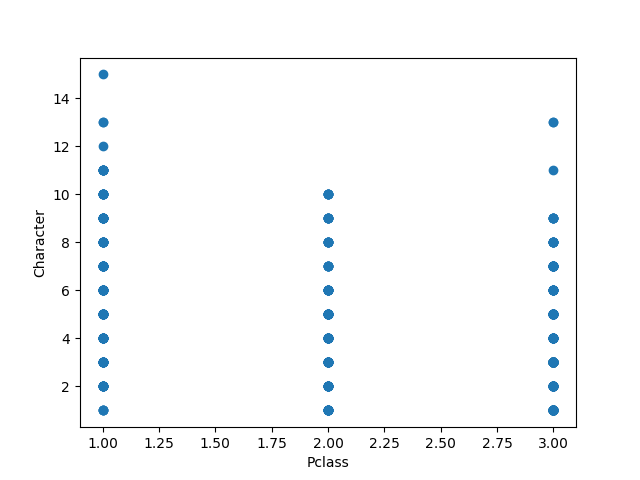

In [224]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0],train_input[:,1])
plt.ylabel('Character')
plt.xlabel('Pclass')
plt.show()

In [225]:
mean = np.mean(train_input,axis=0)
std = np.std(train_input,axis=0)
print(mean,std)

[2.23364486 4.54205607] [0.84033192 2.75911531]


In [226]:
train_scaled = (train_input-mean) / std

In [242]:
test_scaled = (test_input - mean) / std
kn.score(test_scaled,test_target)

0.6536312849162011

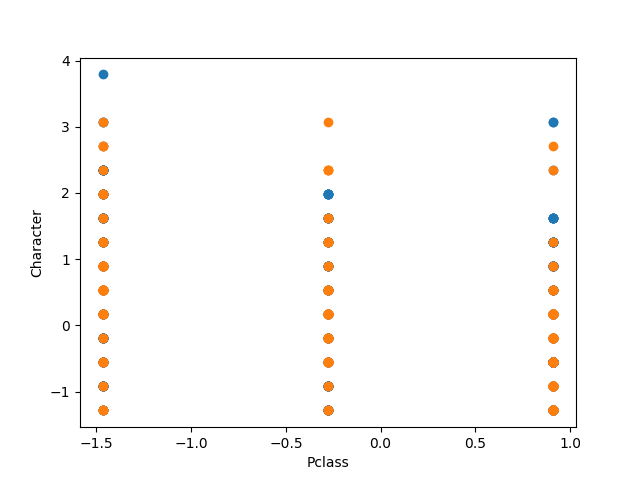

In [228]:
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(test_scaled[:,0],test_scaled[:,1])
plt.ylabel('Character')
plt.xlabel('Pclass')
plt.show()

In [233]:
print(kn.predict(([[3,14]] - mean) / std))

[1]


In [234]:
print(kn.predict(([[3,2]] - mean) / std))

[0]


In [235]:
print(kn.predict(([[2,3]] - mean) / std))

[0]


In [246]:
print(kn.predict(([[3,2]] - mean) / std))

[0]
